## Machine Learning Models:

   Unnamed: 0  Time Serie AUSTRALIA - AUSTRALIAN DOLLAR/US$ BRAZIL - REAL/US$  \
0           0  2006-01-02                                ND                ND   
1           1  2006-01-03                            1.3552            2.3362   
2           2  2006-01-04                            1.3396             2.302   
3           3  2006-01-05                            1.3365             2.281   
4           4  2006-01-06                            1.3284            2.2875   

  CANADA - CANADIAN DOLLAR/US$ CHINA - RENMINBI/US$  \
0                           ND                   ND   
1                       1.1571                8.069   
2                       1.1515               8.0702   
3                       1.1619               8.0678   
4                        1.165               8.0663   

  DENMARK - DANISH KRONE/US$ EURO AREA - EURO/US$  \
0                         ND                   ND   
1                      6.231               0.8348   
2                     6

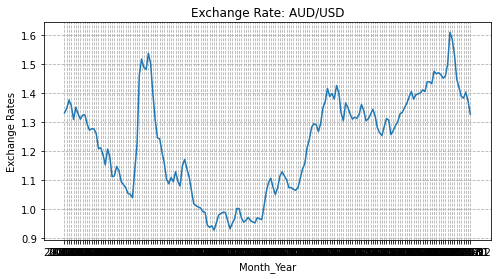

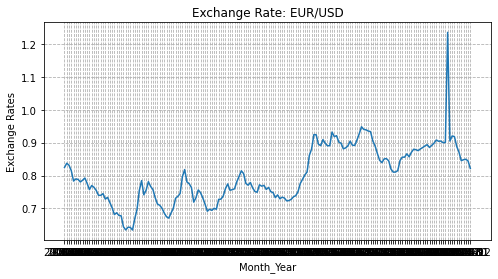

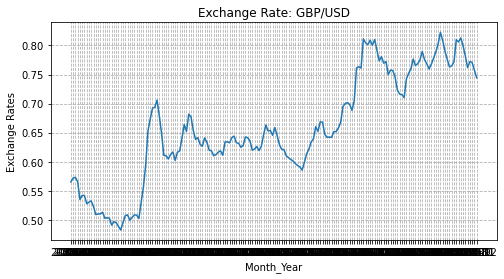

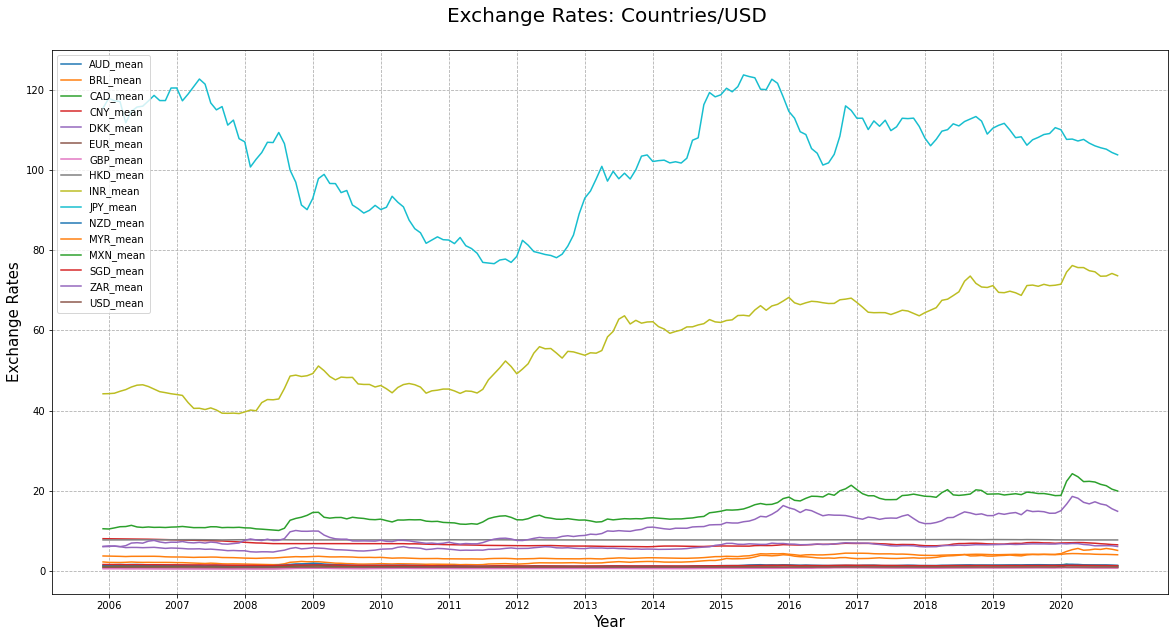

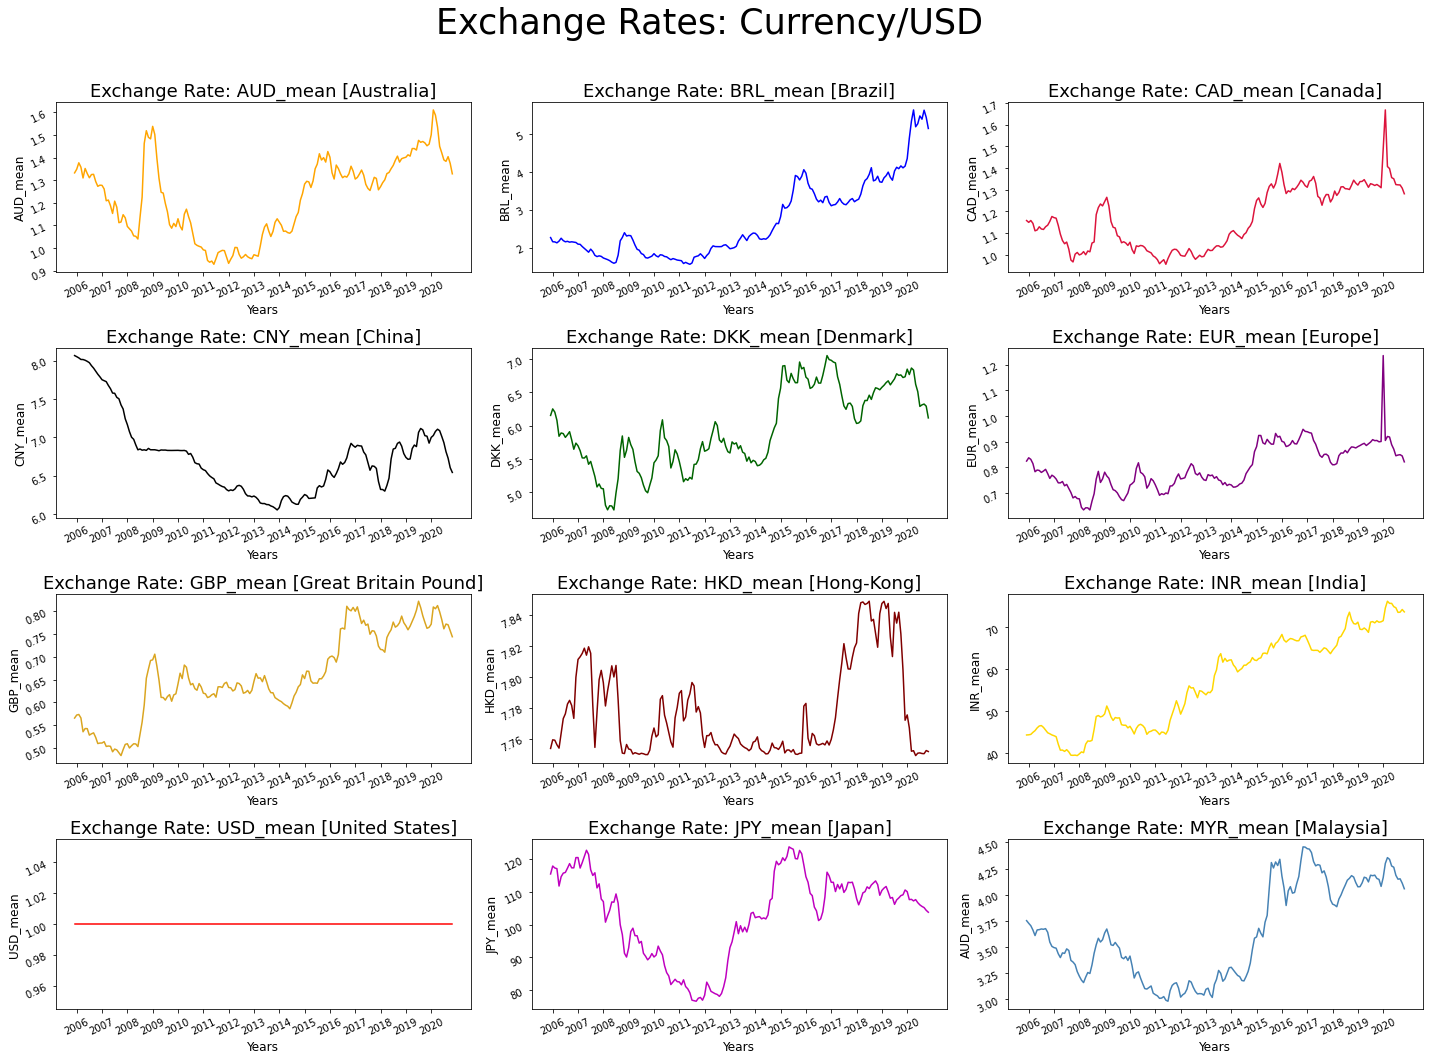

In [1]:
%run Explanatory-Data-Analysis-and-Data-Visualization.ipynb

### Linear Regression

In [2]:
# Importing the Interest Rate Differential
ir_df = pd.read_csv('IR_GBPUSD.csv')
ir_df.head()

,Date,Long Carry,Short Carry
0,1/1/2016,-0.24%,-0.51%
1,2/1/2016,-0.33%,-0.51%
2,3/1/2016,-0.28%,-0.62%
3,4/1/2016,-0.26%,-0.59%
4,5/1/2016,-0.22%,-0.60%


In [3]:
# converting the date to 'YYYY-MM-DD' format
ir_df['Date'] = pd.to_datetime(ir_df['Date'])
ir_df.head()

,Date,Long Carry,Short Carry
0,2016-01-01,-0.24%,-0.51%
1,2016-02-01,-0.33%,-0.51%
2,2016-03-01,-0.28%,-0.62%
3,2016-04-01,-0.26%,-0.59%
4,2016-05-01,-0.22%,-0.60%


In [4]:
# using Long Carry to tranasform the data for the analysis
# removing the percentage from the numbers and then converting them to float
# and reshaping 1D to 2D array
x_ir = ir_df['Long Carry'].astype(str)
x_ir = x_ir.replace({'%':''}, regex = True)
x_ir = x_ir.astype('float')
x_ir = x_ir[~np.isnan(x_ir)]
x_ir = np.array(x_ir).reshape(-1,1)
x_ir

array([[-0.24],
       [-0.33],
       [-0.28],
       [-0.26],
       [-0.22],
       [-0.35],
       [-0.44],
       [-0.41],
       [-0.55],
       [-0.72],
       [-0.73],
       [-0.63],
       [-0.93],
       [-0.83],
       [-0.89],
       [-1.14],
       [-1.27],
       [-1.3 ],
       [-1.32],
       [-1.46],
       [-1.47],
       [-1.52],
       [-1.45],
       [-1.49],
       [-1.62],
       [-1.77],
       [-1.74],
       [-1.65],
       [-1.86],
       [-2.06],
       [-2.12],
       [-2.29],
       [-2.25],
       [-2.38],
       [-2.46],
       [-2.41],
       [-2.51],
       [-2.5 ],
       [-2.85],
       [-2.74],
       [-2.78],
       [-2.82],
       [-2.9 ],
       [-2.97],
       [-2.97],
       [-2.85],
       [-2.73],
       [-2.27],
       [-2.27],
       [-2.08],
       [-2.11],
       [-1.91],
       [-1.48],
       [-1.47],
       [-1.36],
       [-1.14],
       [-1.12],
       [-1.1 ],
       [-1.08],
       [-1.08]])

In [5]:
print("Shape of Interest Long Cary trade:", x_ir.shape)

Shape of Interest Long Cary trade: (60, 1)


In [6]:
# filtering the above years i.e from 2016-2020 from the original dataset
gbp_usd_fx = df_groupby_gbp[(df_groupby_gbp['month_year'] >= '2016-01') & (df_groupby_gbp['month_year'] <= '2020-12')].reset_index(drop=True)
gbp_usd = gbp_usd_fx['GBP_USD']
y_fx = gbp_usd
print("Shape of United Kingdom exchange rate:", y_fx.shape)
y_fx.tail()

Shape of United Kingdom exchange rate: (60,)


55    0.761700
56    0.772220
57    0.770524
58    0.757105
59    0.744300
Name: GBP_USD, dtype: float64

In [7]:
gbp_usd_fx

,month_year,GBP_USD
0,2016-01,0.694942
1,2016-02,0.699965
2,2016-03,0.701852
3,2016-04,0.698476
4,2016-05,0.688514
5,2016-06,0.705209
6,2016-07,0.761445
7,2016-08,0.763330
8,2016-09,0.761110
9,2016-10,0.811280


In [8]:
# Extractinng the dataframe to excel file
file_name = 'GBPFX_20162020.xlsx'
  
# saving the excel
gbp_usd_fx.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [9]:
# Linear Regression with 1 independent variable (interest rate)
# Year: 2016 - 2020

#x_ir = Inerest Rate
#y_fx = Exchange Rate

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x_ir, y_fx, test_size=0.2, random_state=1)

model = LinearRegression()

#training the model with the training datset and predicting with x_test
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(y_predict)

print()

# Accuracy of the training and testing dataset
print('R-squared of training data is: ', model.score(x_train, y_train))
print('R-squared of testing data is: ', model.score(x_test, y_test))

[0.78347339 0.78460057 0.74881244 0.77685118 0.7745968  0.78671405
 0.77840106 0.77882375 0.78403698 0.76811549 0.76769279 0.76557932]

R-squared of training data is:  0.11716216381791089
R-squared of testing data is:  0.26988094814301433


In [10]:
# Linear Regression model without splitting the dataset
model = LinearRegression()
model.fit(x_ir, y_fx)

# predicting the exchange rate(y) with the help of interest rate(x)
y_fx_predict = model.predict(x_ir)
print(y_fx_predict)

print()

# Accuracy
print('R-squared of the entire dataset is: ',model.score(x_ir, y_fx))

[0.74431447 0.74574771 0.74495147 0.74463297 0.74399598 0.7460662
 0.74749943 0.74702169 0.74925116 0.75195838 0.75211763 0.75052515
 0.75530259 0.75371011 0.7546656  0.7586468  0.76071702 0.76119477
 0.76151326 0.76374274 0.76390198 0.76469822 0.76358349 0.76422048
 0.7662907  0.76867942 0.76820168 0.76676845 0.77011266 0.77329762
 0.77425311 0.77696032 0.77632333 0.77839356 0.77966754 0.7788713
 0.78046378 0.78030453 0.78587821 0.78412649 0.78476348 0.78540047
 0.78667445 0.78778919 0.78778919 0.78587821 0.78396724 0.77664183
 0.77664183 0.77361611 0.77409386 0.7709089  0.76406123 0.76390198
 0.76215025 0.7586468  0.7583283  0.75800981 0.75769131 0.75769131]

R-squared of the entire dataset is:  0.15629383049406798


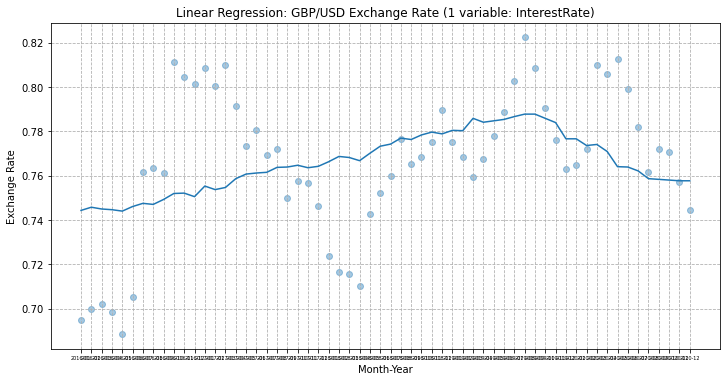

In [11]:
# Visualizing the Linear Regression of Exchange rate and interest rate
month_year = gbp_usd_fx['month_year'].astype(str)

plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict)
plt.title("Linear Regression: GBP/USD Exchange Rate (1 variable: InterestRate)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

### Multiple Linear Regression

In [12]:
# Importing India and USA Interest Rates
gbp_gdp = pd.read_csv("GBPGDP_Ratio.csv")
usa_gdp = pd.read_csv("USAGDP_Ratio.csv")

print(gbp_gdp.head())
print(usa_gdp.head())

print("Shape of GDP(United Kingdom):", gbp_gdp.shape)
print("Shape of GDP(USA):", usa_gdp.shape)

gbp_gdp['month_year'] = pd.to_datetime(gbp_gdp['Date']).dt.to_period('M')
gbp_gdp = gbp_gdp.drop('Date', axis=1)
gbp_gdp = gbp_gdp[['month_year', 'GBP_GDP']]

usa_gdp['month_year'] = pd.to_datetime(usa_gdp['Date']).dt.to_period('M')
usa_gdp = usa_gdp.drop('Date', axis=1)
usa_gdp = usa_gdp[['month_year', 'USA_GDP']]

# gbp_gdp = gbp_gdp.rename(columns={'GDP': 'GBP_GDP'})
gbp_usa_gdp = pd.merge(gbp_gdp, usa_gdp, on="month_year", how="inner")
# gbp_usa_gdp = gbp_usa_gdp.rename(columns={'GDP': 'USA_GDP'})
gbp_usa_gdp['GDP_diff'] = gbp_usa_gdp['GBP_GDP'] - gbp_usa_gdp['USA_GDP']

gbp_usa_gdp_20162020 = gbp_usa_gdp[(gbp_usa_gdp['month_year'] >= '2016-01') & (gbp_usa_gdp['month_year'] <='2020-12')].reset_index(drop=True)
gdp_diff = ["%.4f" %num for num in gbp_usa_gdp_20162020['GDP_diff']]
print(gdp_diff)
print(gbp_usa_gdp.shape)
gbp_usa_gdp.tail()

         Date     GBP_GDP
0  2016-01-01  100.345844
1  2016-02-01  100.328804
2  2016-03-01  100.313503
3  2016-04-01  100.301140
4  2016-05-01  100.292373
         Date    USA_GDP
0  2016-01-01  99.956760
1  2016-02-01  99.909095
2  2016-03-01  99.863858
3  2016-04-01  99.822069
4  2016-05-01  99.787155
Shape of GDP(United Kingdom): (60, 2)
Shape of GDP(USA): (60, 2)
['0.3891', '0.4197', '0.4496', '0.4791', '0.5052', '0.5271', '0.5507', '0.5841', '0.6328', '0.6944', '0.7619', '0.8261', '0.8775', '0.9075', '0.9106', '0.8877', '0.8417', '0.7755', '0.6909', '0.5889', '0.4710', '0.3424', '0.2099', '0.0816', '-0.0340', '-0.1281', '-0.1925', '-0.2224', '-0.2151', '-0.1712', '-0.0982', '-0.0065', '0.0932', '0.1908', '0.2764', '0.3407', '0.3756', '0.3752', '0.3392', '0.2785', '0.2071', '0.1353', '0.0645', '-0.0084', '-0.0859', '-0.1647', '-0.2368', '-0.2912', '-0.3153', '-0.2951', '-3.0830', '-8.4722', '-11.1343', '-8.7356', '-6.3330', '-3.9467', '-3.8337', '-3.7590', '-3.6833', '-4.5331']
(6

,month_year,GBP_GDP,USA_GDP,GDP_diff
55,2020-08,92.618334,96.565043,-3.946709
56,2020-09,93.033355,96.867063,-3.833708
57,2020-10,93.445799,97.204771,-3.758972
58,2020-11,93.855270,97.538547,-3.683277
59,2020-12,93.419446,97.952541,-4.533094


In [13]:
# Extractinng the dataframe to excel file
file_name = 'GBPGDP_Diff.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [14]:
x_ir_gdp = np.array(list(zip(x_ir, gdp_diff)))
x_ir_gdp = x_ir_gdp.astype(np.float)

model.fit(x_ir_gdp, y_fx)
y_fx_predict_2 = model.predict(x_ir_gdp)

print("R-squared after adding GDP growth rate:", model.score(x_ir_gdp, y_fx))

R-squared after adding GDP growth rate: 0.2125096409620898


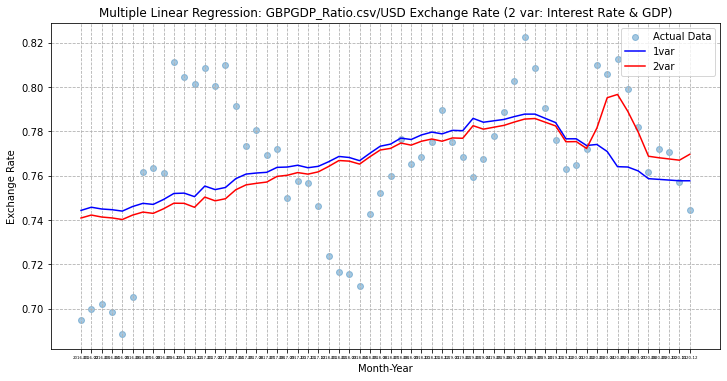

In [15]:
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.legend(["Actual Data", '1var', '2var'])
plt.title("Multiple Linear Regression: GBPGDP_Ratio.csv/USD Exchange Rate (2 var: Interest Rate & GDP)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.grid(ls="--")
plt.show()

In [16]:
#2.3. Variables: Interest Rates & GDP & UER 
unemployment_rate = pd.read_csv("gbp-usa-unemployment-rate.csv")
unemployment_rate.head()

,Date,gbp_unemployment rate,usa_unemployment rate
0,1/1/2016,5.1,4.8
1,2/1/2016,5.1,4.9
2,3/1/2016,5.0,5.0
3,4/1/2016,4.9,5.1
4,5/1/2016,4.9,4.8


In [17]:
unemployment_rate['Date'] = pd.to_datetime(unemployment_rate['Date'])
unemployment_rate.head()

,Date,gbp_unemployment rate,usa_unemployment rate
0,2016-01-01,5.1,4.8
1,2016-02-01,5.1,4.9
2,2016-03-01,5.0,5.0
3,2016-04-01,4.9,5.1
4,2016-05-01,4.9,4.8


In [18]:
# Extractinng the dataframe to excel file
file_name = 'GBP_UER.xlsx'
  
# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [19]:
unemployment_rate['uer_diff'] = unemployment_rate['gbp_unemployment rate'] - unemployment_rate['usa_unemployment rate']
uer_diff_all = unemployment_rate['uer_diff']
uer_diff = ["%.4f" % num for num in uer_diff_all]

print(uer_diff)

['0.3000', '0.2000', '0.0000', '-0.2000', '0.1000', '0.0000', '0.2000', '-0.1000', '-0.2000', '-0.1000', '0.0000', '0.0000', '-0.1000', '0.0000', '0.1000', '0.0000', '0.0000', '0.0000', '0.0000', '-0.1000', '-0.1000', '0.1000', '0.2000', '0.2000', '0.2000', '0.1000', '0.2000', '0.2000', '0.2000', '0.0000', '0.2000', '0.3000', '0.4000', '0.2000', '0.2000', '0.0000', '-0.1000', '0.0000', '0.0000', '0.2000', '0.3000', '0.2000', '0.2000', '0.1000', '0.3000', '0.2000', '0.2000', '0.3000', '0.5000', '0.5000', '-0.4000', '-10.6000', '-9.1000', '-6.7000', '-5.7000', '-3.6000', '-2.9000', '-1.8000', '-1.5000', '-1.6000']


In [20]:
x_ir_gdp_uer = np.array(list(zip(x_ir, gdp_diff, uer_diff)))
x_ir_gdp_uer = x_ir_gdp_uer.astype(np.float)

model.fit(x_ir_gdp_uer, y_fx)
y_fx_predict_3 = model.predict(x_ir_gdp_uer)

print("R-squared after adding Unemployment rate:", model.score(x_ir_gdp_uer, y_fx))

R-squared after adding Unemployment rate: 0.2695729719696559


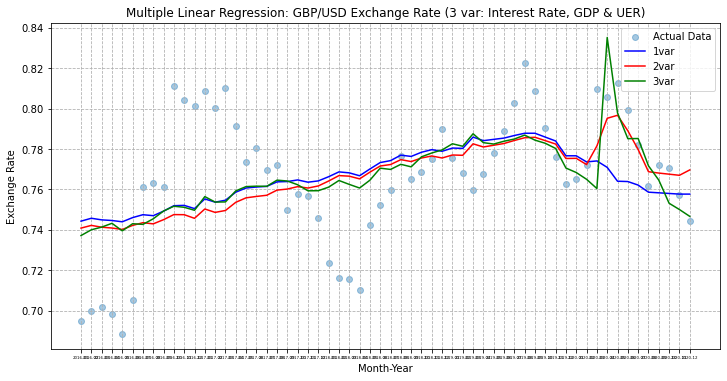

In [21]:
plt.figure(figsize=(12,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.legend(["Actual Data",'1var', '2var', '3var'])
plt.title("Multiple Linear Regression: GBP/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=4)
plt.grid(ls="--")
plt.show()

### Polynomial Regression

[0.69499116 0.69959401 0.70336112 0.69817095 0.68807219 0.70622894
 0.76142071 0.76238712 0.76106819 0.81050631 0.80339231 0.80225591
 0.80809233 0.80083129 0.80899531 0.79357735 0.77505614 0.77517434
 0.77183221 0.77368639 0.74922853 0.75806583 0.76069749 0.738594
 0.7283659  0.71640133 0.72066678 0.70753973 0.73752349 0.7527614
 0.76117861 0.77617697 0.7656821  0.76694377 0.77529754 0.78965144
 0.77505919 0.76708444 0.76050142 0.76698078 0.77777099 0.79392229
 0.79915193 0.82186545 0.80838281 0.79141966 0.77595001 0.76338291
 0.76529712 0.77158074 0.80983568 0.80586419 0.81279362 0.79908564
 0.7819714  0.7616987  0.77222579 0.77050038 0.75712521 0.74429813]

R-squared for Polynomial model with the same varibles: 0.9961612422295753


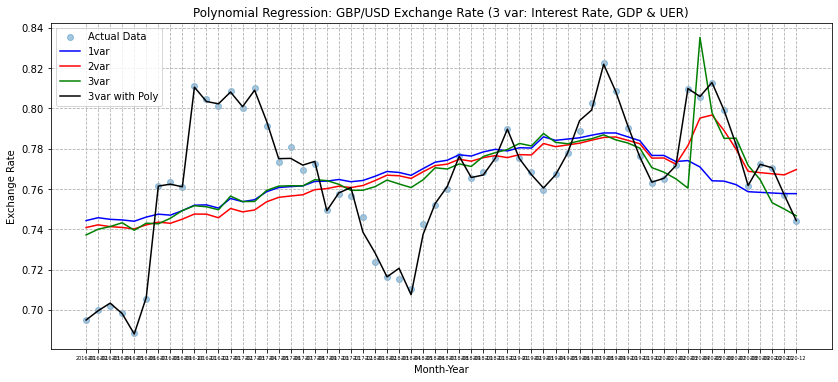

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# poly = PolynomialFeatures(degree=3)
poly = PolynomialFeatures(degree=5)

x_poly = poly.fit_transform(x_ir_gdp_uer)

model_poly = LinearRegression()
model_poly.fit(x_poly, y_fx)
y_pred = model_poly.predict(x_poly)
print(y_pred)
print()
print("R-squared for Polynomial model with the same varibles:", model_poly.score(x_poly, y_fx))

plt.figure(figsize=(14,6))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_fx_predict, color='b')
plt.plot(month_year, y_fx_predict_2, color='r')
plt.plot(month_year, y_fx_predict_3, color='g')
plt.plot(month_year, y_pred, color='black')
plt.legend(["Actual Data", '1var', '2var', '3var', '3var with Poly'])
plt.title("Polynomial Regression: GBP/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

In [23]:
# Converting the predicted values into array
y_pred_df = np.array(y_pred).reshape(-1,1)
y_pred_df

array([[0.69499116],
       [0.69959401],
       [0.70336112],
       [0.69817095],
       [0.68807219],
       [0.70622894],
       [0.76142071],
       [0.76238712],
       [0.76106819],
       [0.81050631],
       [0.80339231],
       [0.80225591],
       [0.80809233],
       [0.80083129],
       [0.80899531],
       [0.79357735],
       [0.77505614],
       [0.77517434],
       [0.77183221],
       [0.77368639],
       [0.74922853],
       [0.75806583],
       [0.76069749],
       [0.738594  ],
       [0.7283659 ],
       [0.71640133],
       [0.72066678],
       [0.70753973],
       [0.73752349],
       [0.7527614 ],
       [0.76117861],
       [0.77617697],
       [0.7656821 ],
       [0.76694377],
       [0.77529754],
       [0.78965144],
       [0.77505919],
       [0.76708444],
       [0.76050142],
       [0.76698078],
       [0.77777099],
       [0.79392229],
       [0.79915193],
       [0.82186545],
       [0.80838281],
       [0.79141966],
       [0.77595001],
       [0.763

In [24]:
# Creating a time-series data with the predicted values
index_values = ['2016-01','2016-02','2016-03','2016-04','2016-05','2016-06','2016-06','2016-08','2016-09','2016-10','2016-11','2016-12',
               '2017-01','2017-02','2017-03','2017-04','2017-05','2017-06','2017-07','2017-08','2017-09','2017-10','2017-11','2017-12',
               '2018-01','2018-02','2018-03','2018-04','2018-05','2018-06','2018-07','2018-08','2018-09','2018-10','2018-11','2018-12',
               '2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12',
               '2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12']
column_values = ['Rates']
y_df = pd.DataFrame(data=y_pred_df, index=index_values, columns=column_values)
y_df

,Rates
2016-01,0.694991
2016-02,0.699594
2016-03,0.703361
2016-04,0.698171
2016-05,0.688072
2016-06,0.706229
2016-06,0.761421
2016-08,0.762387
2016-09,0.761068
2016-10,0.810506


In [25]:
# Changing the index column as a new Column
y_df['month_year']=y_df.index
y_df_2 = y_df.reset_index()
y_df_2 = y_df_2.drop(['index'], axis=1)
y_df_2

new_cols = ['month_year', 'Rates']
y_df_2 = y_df_2[new_cols]
y_df_2

,month_year,Rates
0,2016-01,0.694991
1,2016-02,0.699594
2,2016-03,0.703361
3,2016-04,0.698171
4,2016-05,0.688072
5,2016-06,0.706229
6,2016-06,0.761421
7,2016-08,0.762387
8,2016-09,0.761068
9,2016-10,0.810506


In [26]:
# Extractinng the dataframe to excel file
file_name = 'GBPPred_20162020.xlsx'
  
# saving the excel
y_df_2.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


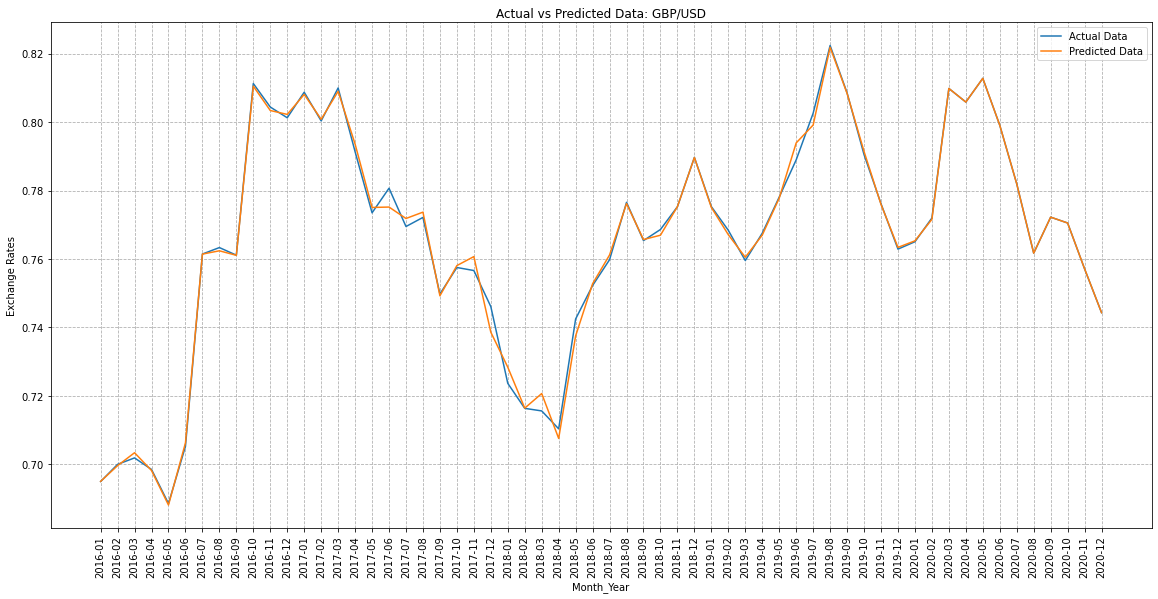

In [27]:
# to visualize the pattern of AUD/USD
x = gbp_usd_fx['month_year'].astype(str)
y = gbp_usd_fx['GBP_USD']

plt.figure(figsize=(16,8))
plt.plot(x, y, label='Actual Data')
plt.plot(x, y_df['Rates'], label='Predicted Data')
plt.tick_params(axis='x',rotation=90)
plt.tight_layout()
plt.title("Actual vs Predicted Data: GBP/USD")
plt.xlabel("Month_Year")
plt.ylabel("Exchange Rates")
plt.legend()
plt.grid(ls='--')
plt.show()

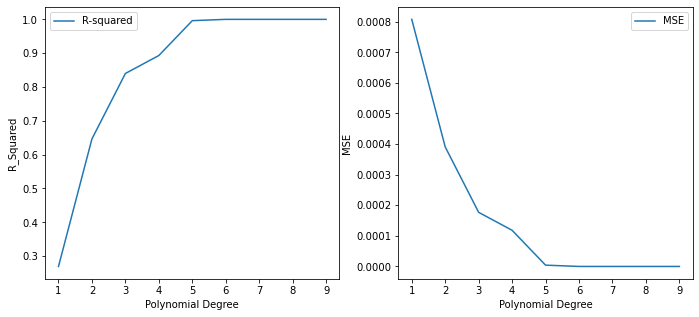

In [28]:
r_squared_list = []
mse_list = []
a = range(1,10,1)

for i in a:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(x_ir_gdp_uer)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly, y_fx)
    y_pred = model_poly.predict(x_poly)
    
    r_squared = model_poly.score(x_poly, y_fx)
    mse = mean_squared_error(y_pred, y_fx)
    
    r_squared_list.append(r_squared)
    mse_list.append(mse)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
plt.plot(a, r_squared_list, label="R-squared")
plt.xlabel("Polynomial Degree")
plt.ylabel("R_Squared")
plt.legend()
ax2 = plt.subplot(1,2,2)
plt.plot(a, mse_list, label="MSE")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.legend()

plt.subplots_adjust(0.0005)

plt.show()

### Ridge Regression and Lasso Regression

In [29]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=0.001)
ridge.fit(x_ir_gdp_uer, y_fx)

y_fx_ridge = ridge.predict(x_ir_gdp_uer)
print("Ridge Regression score:", ridge.score(x_ir_gdp_uer, y_fx))

lasso = Lasso(alpha=0.001)
lasso.fit(x_ir_gdp_uer, y_fx)

y_fx_lasso = lasso.predict(x_ir_gdp_uer)
print("Lasso Regression Score:", lasso.score(x_ir_gdp_uer, y_fx))

Ridge Regression score: 0.26957297169742445
Lasso Regression Score: 0.2617320468736317


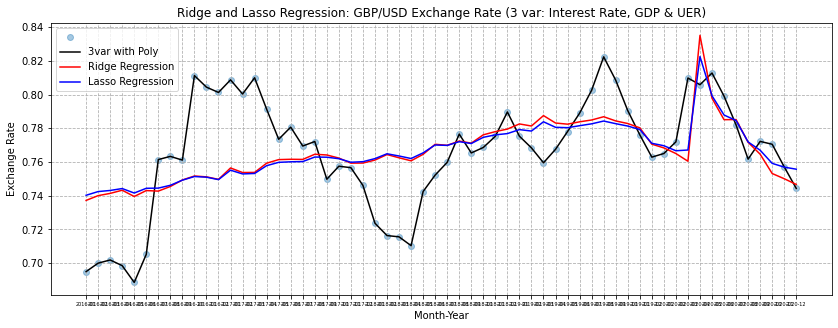

In [38]:
# Visualizing Ridge and Lasso Regression
plt.figure(figsize=(14,5))
plt.scatter(month_year, y_fx, alpha=0.4)
plt.plot(month_year, y_pred, color='black')
plt.plot(month_year, y_fx_ridge, color='r')
plt.plot(month_year, y_fx_lasso, color='b')
plt.legend(['','3var with Poly', 'Ridge Regression', 'Lasso Regression'])
plt.title("Ridge and Lasso Regression: GBP/USD Exchange Rate (3 var: Interest Rate, GDP & UER)")
plt.xlabel("Month-Year")
plt.ylabel("Exchange Rate")
plt.xticks(fontsize=5)
plt.grid(ls="--")
plt.show()

#### Accuracy 2016

In [31]:
def forecast_accuracy(forecast, actual):
    
    mape = np.mean(np.abs(forecast-actual)/np.abs(actual)) #MAPE
    me = np.mean(forecast-actual) #ME
    mae = np.mean(np.abs(forecast-actual)) #MAE
    mpe = np.mean((forecast-actual)/actual) #MPE
    rmse = np.mean((forecast-actual)**2)**.5 #RMSE
    corr = np.corrcoef(forecast, actual)[0,1] #corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]),axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)   # minmax
    accuracy = (1-mape)*100
    return ({'mape':mape, 'me':me, 'mae':mae, 'mpe':mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax, 'Overall accuracy':accuracy})

In [32]:
#Filtering actual data
gbp_usd_fx2016 = df_groupby_gbp[(df_groupby_gbp['month_year'] >= '2016-01') & (df_groupby_gbp['month_year'] <= '2016-12')].reset_index(drop=True)
gbp_usd = gbp_usd_fx2016['GBP_USD']

# filtering predicted data
predicted_data2016 = y_df_2[(y_df_2['month_year'] >= '2016-01') & (y_df_2['month_year'] <= '2016-12')].reset_index(drop=True)
predicted_rates = predicted_data2016['Rates']

actual2016 = np.array(gbp_usd_fx2016['GBP_USD'])
print("---Actual 2016 Exchange Rates---")
print(actual2016)

print()

predicted2016 = np.array(predicted_rates)
print("---Predicted 2016 Exchange Rates---")
print(predicted2016)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2016, actual2016)
accuracy_data2016 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2016'})
accuracy_data2016

---Actual 2016 Exchange Rates---
[0.69494211 0.699965   0.70185217 0.69847619 0.68851429 0.70520909
 0.761445   0.76333043 0.76110952 0.81128    0.804415   0.80127143]

---Predicted 2016 Exchange Rates---
[0.69499116 0.69959401 0.70336112 0.69817095 0.68807219 0.70622894
 0.76142071 0.76238712 0.76106819 0.81050631 0.80339231 0.80225591]


,2016
mape,0.000838
me,-0.000030
mae,0.000624
mpe,-0.000022
rmse,0.000777
corr,0.999868
minmax,0.000837
Overall accuracy,99.916238


#### Accuracy 2017

In [33]:
#Filtering actual data
gbp_usd_fx2017 = df_groupby_gbp[(df_groupby_gbp['month_year'] >= '2017-01') & (df_groupby_gbp['month_year'] <= '2017-12')].reset_index(drop=True)
gbp_usd = gbp_usd_fx2017['GBP_USD']

# filtering predicted data
predicted_data2017 = y_df_2[(y_df_2['month_year'] >= '2017-01') & (y_df_2['month_year'] <= '2017-12')].reset_index(drop=True)
predicted_rates = predicted_data2017['Rates']

actual2017 = np.array(gbp_usd_fx2017['GBP_USD'])
print("---Actual 2017 Exchange Rates---")
print(actual2017)

print()

predicted2017 = np.array(predicted_rates)
print("---Predicted 2017 Exchange Rates---")
print(predicted2017)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2017, actual2017)
accuracy_data2017 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2017'})
accuracy_data2017

---Actual 2017 Exchange Rates---
[0.80874737 0.80035263 0.80998696 0.791345   0.77348636 0.78068182
 0.769485   0.77214783 0.74977    0.75750476 0.75662    0.74608   ]

---Predicted 2017 Exchange Rates---
[0.80809233 0.80083129 0.80899531 0.79357735 0.77505614 0.77517434
 0.77183221 0.77368639 0.74922853 0.75806583 0.76069749 0.738594  ]


,2017
mape,0.003039
me,-0.000198
mae,0.002332
mpe,-0.000269
rmse,0.003170
corr,0.989612
minmax,0.003034
Overall accuracy,99.696116


#### Accuracy 2018

In [34]:
#Filtering actual data
gbp_usd_fx2018 = df_groupby_gbp[(df_groupby_gbp['month_year'] >= '2018-01') & (df_groupby_gbp['month_year'] <= '2018-12')].reset_index(drop=True)
gbp_usd = gbp_usd_fx2018['GBP_USD']

# filtering predicted data
predicted_data2018 = y_df_2[(y_df_2['month_year'] >= '2018-01') & (y_df_2['month_year'] <= '2018-12')].reset_index(drop=True)
predicted_rates = predicted_data2018['Rates']

actual2018 = np.array(gbp_usd_fx2018['GBP_USD'])
print("---Actual 2018 Exchange Rates---")
print(actual2018)

print()

predicted2018 = np.array(predicted_rates)
print("---Predicted 2018 Exchange Rates---")
print(predicted2018)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2018, actual2018)
accuracy_data2018 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2018'})
accuracy_data2018

---Actual 2018 Exchange Rates---
[0.72364286 0.71633684 0.71558182 0.71034762 0.74246818 0.75224762
 0.75979048 0.77655217 0.76537368 0.76861818 0.775275   0.78968889]

---Predicted 2018 Exchange Rates---
[0.7283659  0.71640133 0.72066678 0.70753973 0.73752349 0.7527614
 0.76117861 0.77617697 0.7656821  0.76694377 0.77529754 0.78965144]


,2018
mape,0.002499
me,0.000189
mae,0.001829
mpe,0.000279
rmse,0.002673
corr,0.994873
minmax,0.002491
Overall accuracy,99.750112


#### Accuracy 2019

In [35]:
#Filtering actual data
gbp_usd_fx2019 = df_groupby_gbp[(df_groupby_gbp['month_year'] >= '2019-01') & (df_groupby_gbp['month_year'] <= '2019-12')].reset_index(drop=True)
gbp_usd = gbp_usd_fx2019['GBP_USD']

# filtering predicted data
predicted_data2019 = y_df_2[(y_df_2['month_year'] >= '2019-01') & (y_df_2['month_year'] <= '2019-12')].reset_index(drop=True)
predicted_rates = predicted_data2019['Rates']

actual2019 = np.array(gbp_usd_fx2019['GBP_USD'])
print("---Actual 2019 Exchange Rates---")
print(actual2019)

print()

predicted2019 = np.array(predicted_rates)
print("---Predicted 2019 Exchange Rates---")
print(predicted2019)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2019, actual2019)
accuracy_data2019 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2019'})
accuracy_data2019

---Actual 2019 Exchange Rates---
[0.775305   0.76836667 0.75953333 0.76752727 0.77809091 0.788965
 0.80259091 0.82240455 0.80855    0.79049545 0.77615263 0.76288095]

---Predicted 2019 Exchange Rates---
[0.77505919 0.76708444 0.76050142 0.76698078 0.77777099 0.79392229
 0.79915193 0.82186545 0.80838281 0.79141966 0.77595001 0.76338291]


,2019
mape,0.001492
me,0.000051
mae,0.001174
mpe,0.000072
rmse,0.001846
corr,0.995151
minmax,0.001488
Overall accuracy,99.850815


#### Accuracy 2020

In [36]:
#Filtering actual data
gbp_usd_fx2020 = df_groupby_gbp[(df_groupby_gbp['month_year'] >= '2020-01') & (df_groupby_gbp['month_year'] <= '2020-12')].reset_index(drop=True)
gbp_usd = gbp_usd_fx2020['GBP_USD']

# filtering predicted data
predicted_data2020 = y_df_2[(y_df_2['month_year'] >= '2020-01') & (y_df_2['month_year'] <= '2020-12')].reset_index(drop=True)
predicted_rates = predicted_data2020['Rates']

actual2020 = np.array(gbp_usd_fx2020['GBP_USD'])
print("---Actual 2020 Exchange Rates---")
print(actual2020)

print()

predicted2020 = np.array(predicted_rates)
print("---Predicted 2020 Exchange Rates---")
print(predicted2020)

# Calculating accuracy
accuracy = forecast_accuracy(predicted2020, actual2020)
accuracy_data2020 = pd.DataFrame.from_dict(accuracy, orient='index', columns={'2020'})
accuracy_data2020

---Actual 2020 Exchange Rates---
[0.76503636 0.77197368 0.80983636 0.805865   0.81279444 0.79908636
 0.78197273 0.7617     0.77222    0.77052381 0.757105   0.7443    ]

---Predicted 2020 Exchange Rates---
[0.76529712 0.77158074 0.80983568 0.80586419 0.81279362 0.79908564
 0.7819714  0.7616987  0.77222579 0.77050038 0.75712521 0.74429813]


,2020
mape,0.000077
me,-0.000011
mae,0.000059
mpe,-0.000015
rmse,0.000136
corr,0.999980
minmax,0.000077
Overall accuracy,99.992299


In [37]:
accu2016 = accuracy_data2016['2016'].values[7]
accu2017 = accuracy_data2017['2017'].values[7]
accu2018 = accuracy_data2018['2018'].values[7]
accu2019 = accuracy_data2019['2019'].values[7]
accu2020 = accuracy_data2020['2020'].values[7]

y_axis = [accu2016, accu2017, accu2018, accu2019, accu2020]
x_axis = ['2016', '2017', '2018', '2019', '2020']

accu_df = pd.DataFrame({"Years":x_axis, "Overall Accuracy":y_axis})
accu_df

,Years,Overall Accuracy
0,2016,99.916238
1,2017,99.696116
2,2018,99.750112
3,2019,99.850815
4,2020,99.992299
